# Project 1: SAT & ACT Analysis

## Problem Statement

To boost the SAT participation rates in different states by understanding the correlations between participation rates, subject scoring and other current issues.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:

States with higher participation rate often recorded lower total scores for SAT and lower composite for ACT and vice versa. 
This could be because those who choose to take SAT even when the state mandates taking ACT are those who are of the higher-achieving group and want to challenge themselves. 
Where there is 100% participation in ACT, there is usually less than 10% participation in SAT and vice versa because students only need to take either ACT or SAT to get a place in college.

#### 4a. Does the data look complete? 

At first glance it looks like there are no missing values.

In [5]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [6]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

The composite score for ACT of Wyoming is wrong. There is alsoo an error in the 2017 ACT Science and Math scores for Maryland.

In [7]:
# fixing Wyoming's ACT composite score
act_2017.replace('20.2x', '20.2', inplace = True)

In [8]:
act_2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


In [9]:
# error in Maryland ACT 2017 Science scores
act_2017['Science'] = act_2017['Science'].replace(2.3, 23.2)

In [10]:
# fix error in Math score
sat_2017['Math'] = sat_2017['Math'].replace(52, 524)

#### 5. What are your data types? 
Display the data types of each feature. 

In [11]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [12]:
#code
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Participation for ACT and SAT should be float and Composite for ACT should be float or int

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [13]:
#code
def convert(num):
    out = float(num[0:len(num)-1])/100
    return out

In [14]:
act_2017['Participation'] = act_2017['Participation'].apply(convert)

In [15]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [16]:
sat_2017['Participation'] = sat_2017['Participation'].apply(convert)

In [17]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [18]:
#code
def convert_float(num):
    out = float(num)
    return out

In [19]:
act_2017['Composite'] = act_2017['Composite'].apply(convert_float)

- Display the data types again to confirm they are correct.

In [20]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


In [21]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [22]:
#code
def act_column_name(row):
    name1 = ''
    if row == 'State':
        return row.lower()
    else:
        name1 = 'act_2017_' + row.lower()
        
    return name1

In [23]:
act_2017 = act_2017.rename(act_column_name,axis=1)

In [24]:
#code
def sat_column_name(row):
    name2 = ''
    if row == 'State':
        return row.lower()
    else:
        name2 = 'sat_2017_' + row.lower().replace(" ","_")
        
    return name2

In [25]:
sat_2017 = sat_2017.rename(sat_column_name,axis=1)

In [26]:
sat_2017.head()

,state,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

In [27]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
state                     52 non-null object
act_2017_participation    52 non-null float64
act_2017_english          52 non-null float64
act_2017_math             52 non-null float64
act_2017_reading          52 non-null float64
act_2017_science          52 non-null float64
act_2017_composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**act_2017_participation**|*float*|ACT|Student participation in the standardised test by state| 
|**act_2017_english**|*float*|ACT|The average score obtained by students for the English segment by state, scored between 1 and 36|
|**act_2017_math**|*float*|ACT|The average score obtained by students for the Math segment by state, scored between 1 and 36|
|**act_2017_reading**|*float*|ACT|The average score obtained by students for the Reading segment by state, scored between 1 and 36|
|**act_2017_science**|*float*|ACT|The average score obtained by students for the Science segment by state, scored between 1 and 36|
|**act_2017_composite**|*float*|ACT|The average composite score obtained by students in the state, scored between 1 and 36|

In [28]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                                          51 non-null object
sat_2017_participation                         51 non-null float64
sat_2017_evidence-based_reading_and_writing    51 non-null int64
sat_2017_math                                  51 non-null int64
sat_2017_total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**sat_2017_participation**|*float*|SAT|Student participation in the standardised test by state| 
|**sat_2017_evidence-based_reading_and_writing**|*integer*|SAT|The average score obtained by students for reading and writing by state|
|**sat_2017_math**|*integer*|SAT|The average score obtained by students for the Math segment by state|
|**sat_2017_total**|*integer*|SAT|The average total score obtained by students in the state|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [29]:
# drop the national average score
act_2017.drop([0], inplace = True)

In [30]:
act_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [31]:
#Code:
scores_2017 = act_2017.merge(sat_2017,on='state',how='left')

In [32]:
scores_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [33]:
#code
scores_2017.to_csv(r'../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [34]:
# reading data
act_2018 = pd.read_csv('../data/act_2018_updated.csv')

Used act_2018_updated.csv instead of act_2018.csv because it is the more complete of the two i.e. the updated one contains the average English, Math, Reading and Science scores. The District of Columbia's C is also spelled with upper case instead of lower case in the act_2018.csv file.

In [35]:
# reading data
sat_2018 = pd.read_csv('../data/sat_2018.csv')

In [36]:
# check for missing values, the number of rows and data types 
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [37]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [38]:
# compare the labels and order of labels between 2017 and 2018 ACT data
act_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


In [39]:
#rename 'Percentage of Students Tested'
act_2018 = act_2018.rename(columns={'Percentage of Students Tested': 'participation'})

In [40]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                      51 non-null object
participation              51 non-null int64
Average Composite Score    51 non-null float64
Average English Score      51 non-null float64
Average Math Score         51 non-null float64
Average Reading Score      51 non-null float64
Average Science Score      51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [41]:
# create a function for renaming labels
def act_label(row):    
    name3 = ''
    if row == 'State':
        return row.lower()
    else:
        name3 = 'act_2018_' + row.lower().replace(' ', '_').replace('average_','').replace('_score', '')
        
    return name3

In [42]:
act_2018 = act_2018.rename(act_label,axis=1)

In [43]:
# change the order of labels
act_cols = ['state','act_2018_composite','act_2018_english','act_2018_math','act_2018_reading','act_2018_science','act_2018_participation']
act_2018 = act_2018[act_cols]

In [44]:
# check the labels
act_2018.head()

,state,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation
0,Alabama,19.1,18.9,18.3,19.6,19.0,100
1,Alaska,20.8,19.8,20.6,21.6,20.7,33
2,Arizona,19.2,18.2,19.4,19.5,19.2,66
3,Arkansas,19.4,19.1,18.9,19.7,19.4,100
4,California,22.7,22.5,22.5,23.0,22.1,27


In [45]:
# change participation into a float
def convert(num):
    out = num/100
    return out

act_2018['act_2018_participation'] = act_2018['act_2018_participation'].apply(convert)

In [46]:
# check datatype
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
state                     51 non-null object
act_2018_composite        51 non-null float64
act_2018_english          51 non-null float64
act_2018_math             51 non-null float64
act_2018_reading          51 non-null float64
act_2018_science          51 non-null float64
act_2018_participation    51 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [47]:
# check SAT 2018 data
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [48]:
# converting string to float for SAT's 2018 participation rate
def convert(num):
    out = float(num[0:len(num)-1])/100
    return out

sat_2018['Participation'] = sat_2018['Participation'].apply(convert)

In [49]:
# create a function to rename labels in SAT 2018 data
def sat_label(row):    
    name4 = ''
    if row == 'State':
        return row.lower()
    else:
        name4 = 'sat_2018_' + row.lower().replace(' ', '_')
        
    return name4

In [50]:
sat_2018 = sat_2018.rename(sat_label, axis=1)

In [51]:
# check if data label is similar to SAT 2017
sat_2018.head()

,state,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [52]:
# combine SAT and ACT 2018 data
scores_2018 = act_2018.merge(sat_2018,how='left')

In [53]:
# combine 2017 and 2018 data
final = scores_2017.merge(scores_2018,how='left')

In [54]:
final.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,19.1,18.9,18.3,19.6,19.0,1.00,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,20.8,19.8,20.6,21.6,20.7,0.33,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,19.2,18.2,19.4,19.5,19.2,0.66,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,19.4,19.1,18.9,19.7,19.4,1.00,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,22.7,22.5,22.5,23.0,22.1,0.27,0.60,540,536,1076


In [55]:
# save to csv file
final.to_csv(r'../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [56]:
#Code:
final.describe()

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.398039,569.117647,556.882353,1126.098039,21.486275,20.988235,21.125490,22.015686,21.345098,0.616471,0.457451,563.686275,556.235294,1120.019608
std,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.352766,45.666901,47.121395,92.494812,2.106278,2.446356,2.035765,2.167245,1.870114,0.340810,0.373143,47.502627,47.772623,94.155083
min,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,482.000000,468.000000,950.000000,17.700000,16.600000,17.800000,18.000000,17.900000,0.070000,0.020000,480.000000,480.000000,977.000000
25%,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.040000,533.500000,523.500000,1055.500000,19.950000,19.100000,19.400000,20.450000,19.850000,0.285000,0.045000,534.500000,522.500000,1057.500000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.380000,559.000000,548.000000,1107.000000,21.300000,20.200000,20.700000,21.600000,21.100000,0.660000,0.520000,552.000000,544.000000,1098.000000
75%,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.660000,613.000000,599.000000,1212.000000,23.550000,23.700000,23.150000,24.100000,23.050000,1.000000,0.775000,610.500000,593.500000,1204.000000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000,25.600000,26.000000,25.200000,26.100000,24.900000,1.000000,1.000000,643.000000,655.000000,1298.000000


In [57]:
final.columns[0]

'state'

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [58]:
import math

In [59]:
#function to calculate standard deviation
def mean(data):
    return float(sum(data) / len(data))

def stdev(data):
    mu = mean(data)
    return math.sqrt(mean([(x - mu) ** 2 for x in data]))

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [60]:
# data dictionary for the standard deviation function
sd = {col.name:stdev(col) for col in [final[i] for i in final.columns 
                                         if (final[i].dtype=='float64') or (final[i].dtype=='int64')]}

In [61]:
sd

{'act_2017_participation': 0.3182417575123181,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2017_participation': 0.3492907076664507,
 'sat_2017_evidence-based_reading_and_writing': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2018_composite': 2.0855261815801147,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543,
 'act_2018_participation': 0.33745194881997503,
 'sat_2018_participation': 0.3694661922353942,
 'sat_2018_evidence-based_reading_and_writing': 47.03460978357609,
 'sat_2018_math': 47.30194550378352,
 'sat_2018_total': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [62]:
final.describe()

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.398039,569.117647,556.882353,1126.098039,21.486275,20.988235,21.125490,22.015686,21.345098,0.616471,0.457451,563.686275,556.235294,1120.019608
std,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.352766,45.666901,47.121395,92.494812,2.106278,2.446356,2.035765,2.167245,1.870114,0.340810,0.373143,47.502627,47.772623,94.155083
min,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,482.000000,468.000000,950.000000,17.700000,16.600000,17.800000,18.000000,17.900000,0.070000,0.020000,480.000000,480.000000,977.000000
25%,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.040000,533.500000,523.500000,1055.500000,19.950000,19.100000,19.400000,20.450000,19.850000,0.285000,0.045000,534.500000,522.500000,1057.500000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.380000,559.000000,548.000000,1107.000000,21.300000,20.200000,20.700000,21.600000,21.100000,0.660000,0.520000,552.000000,544.000000,1098.000000
75%,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.660000,613.000000,599.000000,1212.000000,23.550000,23.700000,23.150000,24.100000,23.050000,1.000000,0.775000,610.500000,593.500000,1204.000000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000,25.600000,26.000000,25.200000,26.100000,24.900000,1.000000,1.000000,643.000000,655.000000,1298.000000


There is a small but negligible difference for each standard deviation.

In [63]:
# using numpy's std
np.std(final, axis = 0)

act_2017_participation                          0.318242
act_2017_english                                2.330488
act_2017_math                                   1.962462
act_2017_reading                                2.046903
act_2017_science                                1.722216
act_2017_composite                              2.000786
sat_2017_participation                          0.349291
sat_2017_evidence-based_reading_and_writing    45.216970
sat_2017_math                                  46.657134
sat_2017_total                                 91.583511
act_2018_composite                              2.085526
act_2018_english                                2.422254
act_2018_math                                   2.015707
act_2018_reading                                2.145892
act_2018_science                                1.851689
act_2018_participation                          0.337452
sat_2018_participation                          0.369466
sat_2018_evidence-based_reading

numpy's std method gives the same answer as the manually calculated one. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [64]:
# SAT 2017 highest participation rate
final.sort_values(by='sat_2017_participation',ascending=False).head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,...,23.6,23.7,22.7,24.4,23.0,0.32,0.92,497,480,977
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,...,24.4,24.5,23.9,24.7,23.9,0.22,1.00,511,499,1011
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,...,25.6,26.0,24.8,26.1,24.9,0.26,1.00,535,519,1053
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,...,23.2,23.7,23.1,24.5,23.4,0.17,1.00,505,492,998
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,...,25.1,25.1,24.7,25.6,24.4,0.16,0.96,535,528,1063


In [65]:
# SAT 2017 lowest participation rate
final.sort_values(by='sat_2017_participation').head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
34,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,...,20.3,19.1,20.3,20.7,20.5,0.98,0.02,640,643,1283
24,Mississippi,1.00,18.2,18.1,18.8,18.8,18.6,0.02,634,607,...,18.6,18.2,18.1,18.9,18.6,1.00,0.03,630,606,1236
15,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,...,21.8,21.0,21.2,22.5,22.0,0.68,0.03,634,631,1265
25,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640,631,...,20.0,19.5,19.7,20.5,20.0,1.00,0.04,633,629,1262
44,Utah,1.00,19.5,19.9,20.8,20.6,20.3,0.03,624,614,...,20.4,19.7,19.9,20.9,20.5,1.00,0.04,480,530,1010


In [66]:
# SAT 2018 highest participation rate
final.sort_values(by='sat_2018_participation',ascending=False).head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,...,23.9,23.9,23.2,24.4,23.5,0.30,1.0,519,506,1025
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,...,25.6,26.0,24.8,26.1,24.9,0.26,1.0,535,519,1053
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,...,23.2,23.7,23.1,24.5,23.4,0.17,1.0,505,492,998
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,...,24.4,24.5,23.9,24.7,23.9,0.22,1.0,511,499,1011
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,...,22.3,21.9,21.6,23.2,22.1,0.36,1.0,508,493,1001


In [67]:
# SAT 2018 lowest participation rate
final.sort_values(by='sat_2018_participation').head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
34,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,...,20.3,19.1,20.3,20.7,20.5,0.98,0.02,640,643,1283
50,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2,0.03,626,604,...,20.0,19.0,19.7,20.6,20.3,1.00,0.03,633,625,1257
41,South Dakota,0.80,20.7,21.5,22.3,22.0,21.8,0.03,612,603,...,21.9,20.8,21.6,22.4,22.2,0.77,0.03,622,618,1240
27,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,625,...,20.1,19.4,19.8,20.4,20.1,1.00,0.03,629,623,1252
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,...,20.5,19.8,20.3,20.6,20.8,1.00,0.03,641,653,1294


In [68]:
# ACT 2017 highest participation rate
# did not use .sort_values with .head because there are more than 5 states with 100% participation rate
final[['state', 'act_2017_participation']][final['act_2017_participation'] == 1.00]

,state,act_2017_participation
0,Alabama,1.0
3,Arkansas,1.0
5,Colorado,1.0
17,Kentucky,1.0
18,Louisiana,1.0
23,Minnesota,1.0
24,Mississippi,1.0
25,Missouri,1.0
26,Montana,1.0
28,Nevada,1.0


In [69]:
# ACT 2017 lowest participation rate
final.sort_values(by='act_2017_participation').head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,...,24.0,23.8,23.6,24.7,23.4,0.07,0.99,512,501,1013
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,...,25.1,25.1,24.7,25.6,24.4,0.16,0.96,535,528,1063
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,...,23.2,23.7,23.1,24.5,23.4,0.17,1.00,505,492,998
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,...,24.2,24.4,23.6,25.0,23.5,0.15,0.97,513,505,1018
38,Pennsylvania,0.23,23.4,23.4,24.2,23.3,23.7,0.65,540,531,...,23.5,23.3,23.2,24.0,23.1,0.20,0.70,547,539,1086


In [70]:
# ACT 2018 highest participation rate
final[['state', 'act_2018_participation']][final['act_2018_participation'] == 1.00]

,state,act_2018_participation
0,Alabama,1.0
3,Arkansas,1.0
17,Kentucky,1.0
18,Louisiana,1.0
24,Mississippi,1.0
25,Missouri,1.0
26,Montana,1.0
27,Nebraska,1.0
28,Nevada,1.0
33,North Carolina,1.0


In [71]:
# ACT 2018 lowest participation rate
final.sort_values(by='act_2018_participation').head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,...,24.0,23.8,23.6,24.7,23.4,0.07,0.99,512,501,1013
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,...,24.2,24.4,23.6,25.0,23.5,0.15,0.97,513,505,1018
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,...,25.1,25.1,24.7,25.6,24.4,0.16,0.96,535,528,1063
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,...,23.2,23.7,23.1,24.5,23.4,0.17,1.00,505,492,998
38,Pennsylvania,0.23,23.4,23.4,24.2,23.3,23.7,0.65,540,531,...,23.5,23.3,23.2,24.0,23.1,0.20,0.70,547,539,1086


Answers for highest and lowest participation rates:

2017 SAT:
* Highest: District of Columbia, Michigan, Connecticut, Delaware, New Hampshire
* Lowest: North Dakota, Mississippi, Iowa, Missouri, Utah

2018 SAT:
* Highest: Colorado, Connecticut, Delaware, Michigan, Idaho
* Lowest: North Dakota, Wyoming, South Dakota, Nebraska, Wisconsin

2017 ACT:
* Highest: Alabama, Kentucky, Wisconsin, Utah, Tennessee, etc.
* Lowest: Maine, New Hampshire, Delaware, Rhode Island, Pennsylvania 

2018 ACT:
* Highest: Alabama, Kentucky, Wisconsin, Utah, Tennessee, etc.
* Lowest: Maine, Rhode Island, New Hampshire, Delaware, Pennsylvania

In [72]:
# SAT 2017 highest mean total
final.sort_values(by='sat_2017_total',ascending=False).head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
23,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,...,21.3,20.2,21.4,21.7,21.4,0.99,0.04,643,655,1298
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,...,20.5,19.8,20.3,20.6,20.8,1.00,0.03,641,653,1294
15,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,...,21.8,21.0,21.2,22.5,22.0,0.68,0.03,634,631,1265
25,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640,631,...,20.0,19.5,19.7,20.5,20.0,1.00,0.04,633,629,1262
16,Kansas,0.73,21.1,21.3,22.3,21.7,21.7,0.04,632,628,...,21.6,21.0,21.1,22.3,21.5,0.71,0.04,633,631,1265


In [73]:
# SAT 2017 lowest mean total
final.sort_values(by='sat_2017_total').head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,...,23.6,23.7,22.7,24.4,23.0,0.32,0.92,497,480,977
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,...,23.2,23.7,23.1,24.5,23.4,0.17,1.00,505,492,998
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,...,22.3,21.9,21.6,23.2,22.1,0.36,1.00,508,493,1001
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,...,24.4,24.5,23.9,24.7,23.9,0.22,1.00,511,499,1011
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,...,24.0,23.8,23.6,24.7,23.4,0.07,0.99,512,501,1013


In [74]:
# SAT 2018 highest mean total
final.sort_values(by='sat_2018_total',ascending=False).head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
23,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,...,21.3,20.2,21.4,21.7,21.4,0.99,0.04,643,655,1298
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,...,20.5,19.8,20.3,20.6,20.8,1.00,0.03,641,653,1294
34,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,...,20.3,19.1,20.3,20.7,20.5,0.98,0.02,640,643,1283
15,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,...,21.8,21.0,21.2,22.5,22.0,0.68,0.03,634,631,1265
16,Kansas,0.73,21.1,21.3,22.3,21.7,21.7,0.04,632,628,...,21.6,21.0,21.1,22.3,21.5,0.71,0.04,633,631,1265


In [75]:
# SAT 2018 lowest mean total
final.sort_values(by='sat_2018_total').head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,...,23.6,23.7,22.7,24.4,23.0,0.32,0.92,497,480,977
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,...,23.2,23.7,23.1,24.5,23.4,0.17,1.00,505,492,998
48,West Virginia,0.69,20.0,19.4,21.2,20.5,20.4,0.14,558,528,...,20.3,19.8,19.4,21.3,20.4,0.65,0.28,513,486,999
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,...,22.3,21.9,21.6,23.2,22.1,0.36,1.00,508,493,1001
44,Utah,1.00,19.5,19.9,20.8,20.6,20.3,0.03,624,614,...,20.4,19.7,19.9,20.9,20.5,1.00,0.04,480,530,1010


In [76]:
# ACT 2017 highest mean composite
final.sort_values(by='act_2017_composite',ascending=False).head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,...,25.1,25.1,24.7,25.6,24.4,0.16,0.96,535,528,1063
21,Massachusetts,0.29,25.4,25.3,25.9,24.7,25.4,0.76,555,551,...,25.5,25.5,25.2,25.9,24.7,0.25,0.80,562,563,1125
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,...,25.6,26.0,24.8,26.1,24.9,0.26,1.00,535,519,1053
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,...,24.0,23.8,23.6,24.7,23.4,0.07,0.99,512,501,1013
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,...,23.6,23.7,22.7,24.4,23.0,0.32,0.92,497,480,977


In [77]:
# ACT 2017 lowest mean composite
final.sort_values(by='act_2017_composite').head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
28,Nevada,1.0,16.3,18.0,18.1,18.2,17.8,0.26,563,553,...,17.7,16.6,17.8,18.0,17.9,1.00,0.23,574,566,1140
24,Mississippi,1.0,18.2,18.1,18.8,18.8,18.6,0.02,634,607,...,18.6,18.2,18.1,18.9,18.6,1.00,0.03,630,606,1236
40,South Carolina,1.0,17.5,18.6,19.1,18.9,18.7,0.50,543,521,...,18.3,17.3,18.2,18.6,18.5,1.00,0.55,547,523,1070
11,Hawaii,0.9,17.8,19.2,19.2,19.3,19.0,0.55,544,541,...,18.9,18.2,19.0,19.1,19.0,0.89,0.56,480,530,1010
33,North Carolina,1.0,17.8,19.3,19.6,19.3,19.1,0.49,546,535,...,19.1,18.0,19.3,19.5,19.2,1.00,0.52,554,543,1098


In [78]:
# ACT 2018 highest mean composite
final.sort_values(by='act_2018_composite',ascending=False).head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,...,25.6,26.0,24.8,26.1,24.9,0.26,1.00,535,519,1053
21,Massachusetts,0.29,25.4,25.3,25.9,24.7,25.4,0.76,555,551,...,25.5,25.5,25.2,25.9,24.7,0.25,0.80,562,563,1125
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,...,25.1,25.1,24.7,25.6,24.4,0.16,0.96,535,528,1063
32,New York,0.31,23.8,24.0,24.6,23.9,24.2,0.67,528,523,...,24.5,24.2,24.2,24.9,24.2,0.27,0.79,534,534,1068
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,...,24.4,24.5,23.9,24.7,23.9,0.22,1.00,511,499,1011


In [79]:
# ACT 2018 lowest mean composite
final.sort_values(by='act_2018_composite').head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
28,Nevada,1.0,16.3,18.0,18.1,18.2,17.8,0.26,563,553,...,17.7,16.6,17.8,18.0,17.9,1.00,0.23,574,566,1140
40,South Carolina,1.0,17.5,18.6,19.1,18.9,18.7,0.50,543,521,...,18.3,17.3,18.2,18.6,18.5,1.00,0.55,547,523,1070
24,Mississippi,1.0,18.2,18.1,18.8,18.8,18.6,0.02,634,607,...,18.6,18.2,18.1,18.9,18.6,1.00,0.03,630,606,1236
11,Hawaii,0.9,17.8,19.2,19.2,19.3,19.0,0.55,544,541,...,18.9,18.2,19.0,19.1,19.0,0.89,0.56,480,530,1010
0,Alabama,1.0,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,19.1,18.9,18.3,19.6,19.0,1.00,0.06,595,571,1166


Answers for highest and lowest mean total/ composite:

2017 SAT:
* Highest: Minnesota, Wisconsin, Iowa, Missouri, Kansas
* Lowest: District of Columbia, Delaware, Idaho, Michigan, Maine

2018 SAT:
* Highest: Minnesota,  Wisconsin, North Dakota, Iowa, Kansas
* Lowest: District of Columbia, Delaware, West Virginia, Idaho, Utah

2017 ACT:
* Highest: New Hampshire, Massachusetts, Connecticut, Maine, District of Columbia 
* Lowest: Nevada, Mississippi, South Carolina, Hawaii, North Carolina

2018 ACT:
* Highest: Connecticut, Massachusetts, New Hampshire, New York, Michigan
* Lowest: Nevada, South Carolina, Mississippi, Hawaii, Alabama

In [80]:
#Do any states with 100% participation on a given test have a rate change year-to-year?
final[(final['sat_2017_participation'] == 1.00) & (final['sat_2018_participation'] != 1.00)].head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.0,482,468,...,23.6,23.7,22.7,24.4,23.0,0.32,0.92,497,480,977


Only one state - District of Columbia, with an initial participation rate of 100% in SAT showed a rate change to 92% from 2017 to 2018.

In [81]:
final[(final['act_2017_participation'] == 1.00) & (final['act_2018_participation'] != 1.00)].head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
5,Colorado,1.0,20.1,20.3,21.2,20.9,20.8,0.11,606,595,...,23.9,23.9,23.2,24.4,23.5,0.30,1.00,519,506,1025
23,Minnesota,1.0,20.4,21.5,21.8,21.6,21.5,0.03,644,651,...,21.3,20.2,21.4,21.7,21.4,0.99,0.04,643,655,1298


Colorado and Minnesota, both with initial participation rates of 100% in ACT in 2017 showed rate changes to 30% and 99% respectively in 2018.
Colorado seems to have made a switch to require students to take SAT instead of ACT in 2018.

In [82]:
#Do any states have >50% participation on both tests either year?
final[(final['sat_2017_participation'] > 0.50) & (final['act_2017_participation'] > 0.50)].head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,...,19.9,19.2,19.3,21.1,19.5,0.66,0.56,550,549,1099
10,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,...,21.4,20.9,20.7,21.2,21.4,0.53,0.70,542,522,1064
11,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544,541,...,18.9,18.2,19.0,19.1,19.0,0.89,0.56,480,530,1010


In 2017, Florida, Georgia and Hawaii students had more than 50% participation rate in both ACT and SAT.

In [83]:
final[(final['sat_2018_participation'] > 0.50) & (final['act_2018_participation'] > 0.50)]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,...,19.9,19.2,19.3,21.1,19.5,0.66,0.56,550,549,1099
10,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,...,21.4,20.9,20.7,21.2,21.4,0.53,0.70,542,522,1064
11,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544,541,...,18.9,18.2,19.0,19.1,19.0,0.89,0.56,480,530,1010
33,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1,0.49,546,535,...,19.1,18.0,19.3,19.5,19.2,1.00,0.52,554,543,1098
40,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,0.50,543,521,...,18.3,17.3,18.2,18.6,18.5,1.00,0.55,547,523,1070


In 2018, North and South Carolina joined the likes of Florida, Georgia and Hawaii where there are more than 50% of the students sat for both SAT and ACT.
For North and South Carolina, 100% of the students sat for ACT. 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

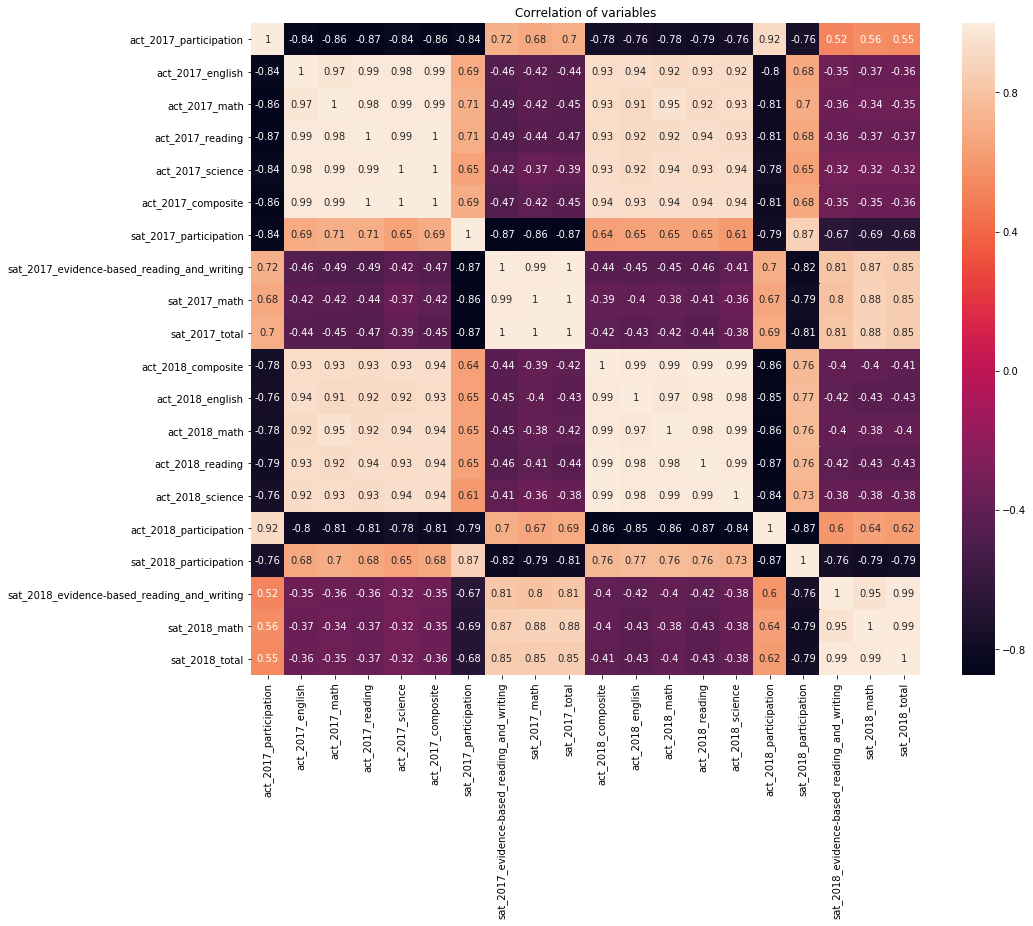

In [84]:
plt.figure(figsize=(15,12))
ax = sns.heatmap(final.corr(), annot=True)
ax.set_title('Correlation of variables');

The participation rates for both SAT and ACT are negatively correlated with their respective test scores.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [85]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [86]:
# Code
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (16,11)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

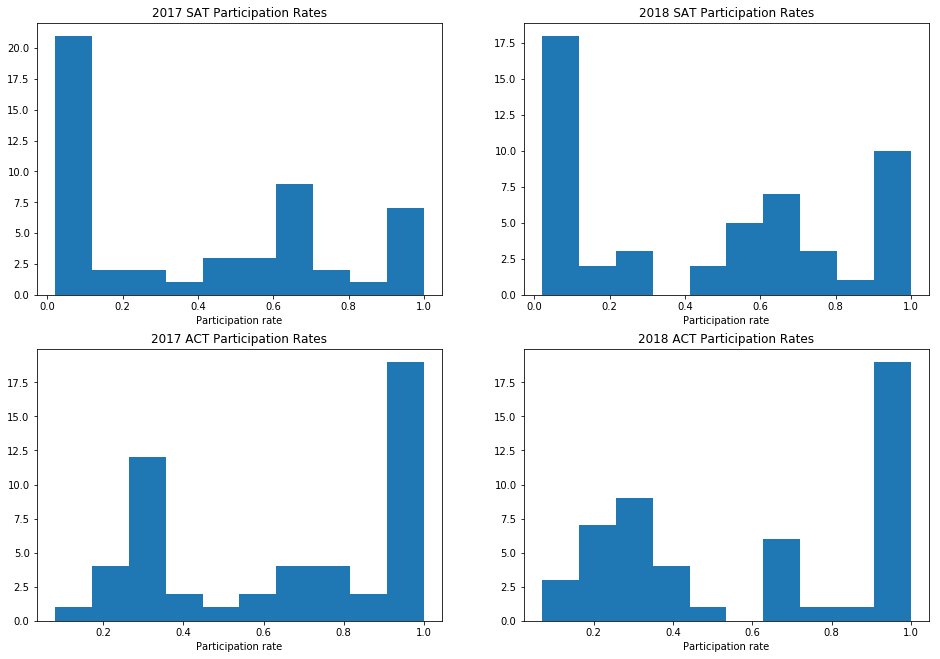

In [87]:
columns = ['sat_2017_participation','sat_2018_participation','act_2017_participation','act_2018_participation']
titles = ['2017 SAT Participation Rates','2018 SAT Participation Rates','2017 ACT Participation Rates','2018 ACT Participation Rates']
xlabels = ['Participation rate','Participation rate','Participation rate','Participation rate']
subplot_histograms(final, columns, titles, xlabels)

ACT seems to be the more popular standardised test with many more occurences of 100% participation rate than SAT. As a result of the ACT requirement set by certain states, these states also see 0% participation rate in SAT.

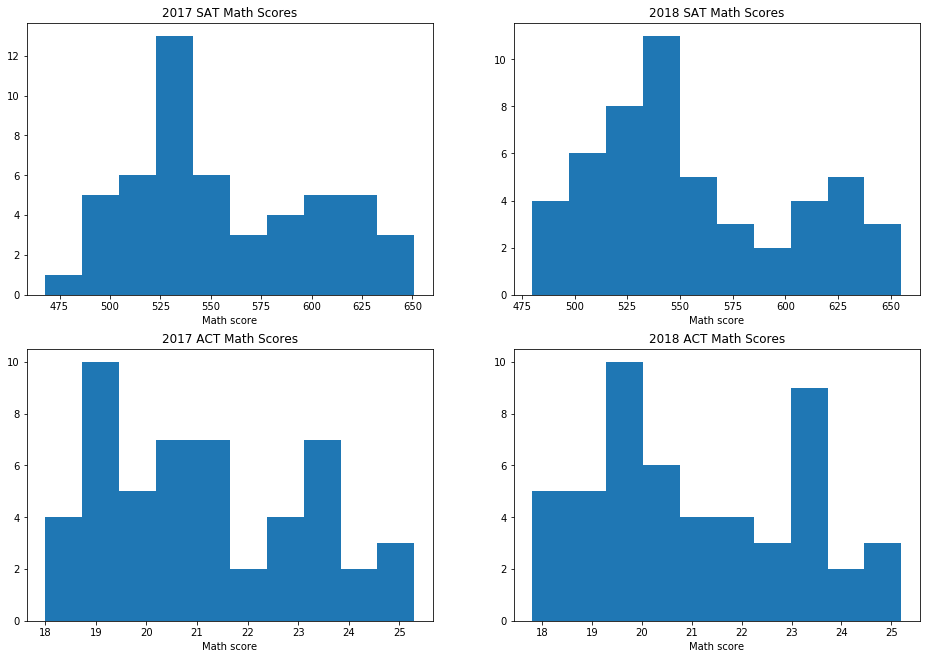

In [88]:
columns = ['sat_2017_math','sat_2018_math','act_2017_math','act_2018_math']
titles = ['2017 SAT Math Scores','2018 SAT Math Scores','2017 ACT Math Scores','2018 ACT Math Scores']
xlabels = ['Math score','Math score','Math score','Math score']
subplot_histograms(final, columns, titles, xlabels)

The most obvious difference is the one observed between 2017 and 2018 SAT math scores. There was 1 state with an average score in the range of 100 in 2017, while the rest of the states had average scores of above 400.

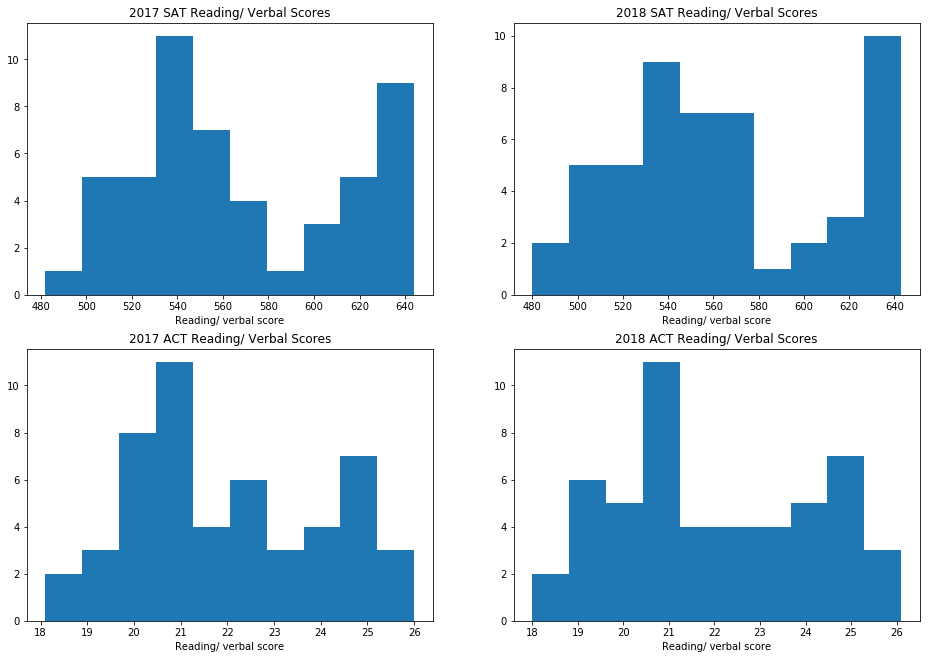

In [89]:
columns = ['sat_2017_evidence-based_reading_and_writing','sat_2018_evidence-based_reading_and_writing','act_2017_reading','act_2018_reading']
titles = ['2017 SAT Reading/ Verbal Scores','2018 SAT Reading/ Verbal Scores','2017 ACT Reading/ Verbal Scores','2018 ACT Reading/ Verbal Scores']
xlabels = ['Reading/ verbal score','Reading/ verbal score','Reading/ verbal score','Reading/ verbal score']
subplot_histograms(final, columns, titles, xlabels)

For SAT in 2017 and 2018, there were 2 peaks around the scores of 540 and 635. SAT's reading and writing test seems to separate the states almost neatly into two groups. For ACT for both years, the peak was at score 21. At the extreme end of 26, 3 states managed to achieve that score as compared to 9 and 10 states being able to achieve the highest score in SAT. This could mean that ACT is able to differentiate higher-performing students better.


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


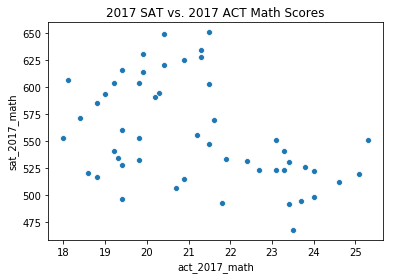

In [90]:
# SAT vs. ACT math scores for 2017
sns.scatterplot(x='act_2017_math',y='sat_2017_math',data=final);
plt.title('2017 SAT vs. 2017 ACT Math Scores');

There is weak negative correlation between 2017 ACT Math and SAT Math scores.

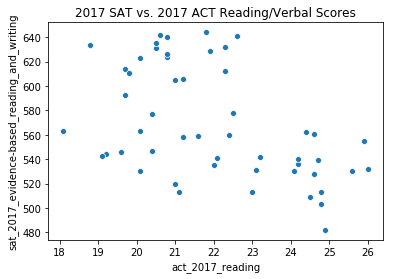

In [91]:
#SAT vs. ACT verbal/reading scores for 2017
sns.scatterplot(x='act_2017_reading', y='sat_2017_evidence-based_reading_and_writing',data=final);
plt.title('2017 SAT vs. 2017 ACT Reading/Verbal Scores');

There is weak negative correlation between the reading/verbal scores for SAT and ACT in 2017. This suggests that states that do well in ACT tend to do poorly in SAT and vice versa.

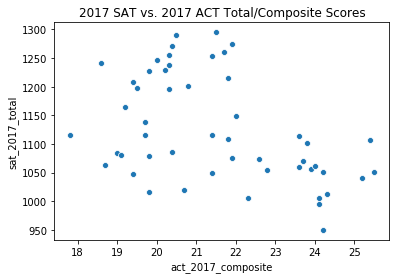

In [92]:
#SAT vs. ACT total/composite scores for 2017
sns.scatterplot(x='act_2017_composite', y='sat_2017_total',data=final);
plt.title('2017 SAT vs. 2017 ACT Total/Composite Scores');

Similarly, for total scores, there is weak negative correlation between SAT and ACT in 2017. States that do well in ACT tend to do poorly in SAT and vice versa.

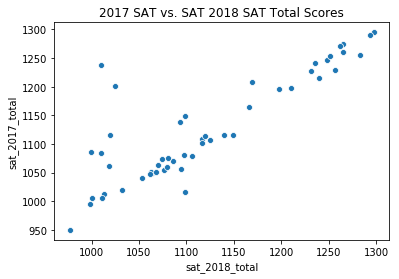

In [93]:
#Total scores for SAT 2017 vs. SAT 2018
sns.scatterplot(x='sat_2018_total', y='sat_2017_total',data=final);
plt.title('2017 SAT vs. SAT 2018 SAT Total Scores');

The 2017 and 2018 SAT scores are positively correlated. States that do well in 2017 also do well in 2018, with the exception of two of the states. It could be due to their sudden increase in participation rate. When students do not self-select into a test, they tend to do poorly compared to students who self-select. 

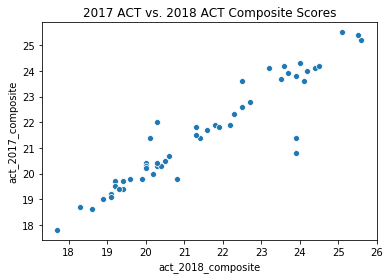

In [94]:
#Composite scores for ACT 2017 vs. ACT 2018
sns.scatterplot(x='act_2018_composite', y='act_2017_composite',data=final);
plt.title('2017 ACT vs. 2018 ACT Composite Scores');

The 2017 and 2018 ACT scores are positively correlated. Two of the states performed significantly better in 2018 than in 2017.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [95]:
final.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,...,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_participation,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,19.1,18.9,18.3,19.6,19.0,1.00,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,20.8,19.8,20.6,21.6,20.7,0.33,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,19.2,18.2,19.4,19.5,19.2,0.66,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,19.4,19.1,18.9,19.7,19.4,1.00,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,22.7,22.5,22.5,23.0,22.1,0.27,0.60,540,536,1076


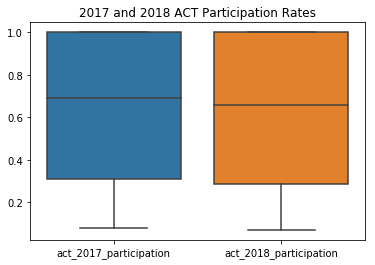

In [96]:
# 2017 and 2018 ACT Participation Rates
act_participation = pd.DataFrame(final[['act_2017_participation','act_2018_participation']])

sns.boxplot(orient='v', data = act_participation);
plt.title('2017 and 2018 ACT Participation Rates');

Median participation rate decreased by a little in 2018. The range is very large, given that the maximum value is 100% and the minimum is 0%

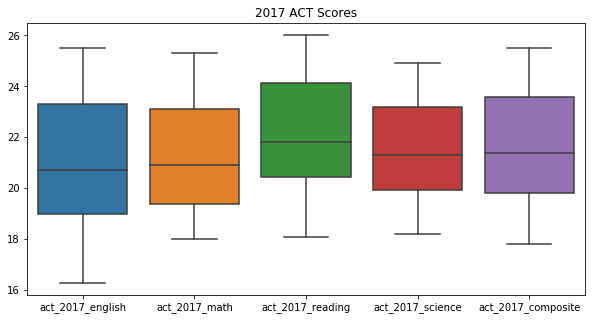

In [97]:
# 2017 ACT Scores
act_2017_scores = pd.DataFrame(final[['act_2017_english','act_2017_math','act_2017_reading','act_2017_science','act_2017_composite']])

plt.figure(figsize=(10,5))
sns.boxplot(orient='v', data = act_2017_scores);
plt.title('2017 ACT Scores');

The paper with the highest median score is reading, while the paper with the lowest median score is English. English has the biggest range and interquartile range. States that have scores above the median have a wider spread of scores but those below the median are bunched around similar scores.

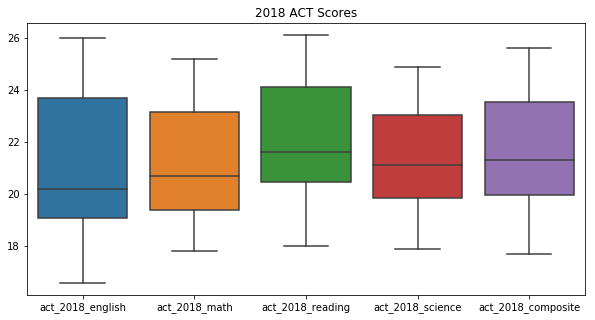

In [98]:
# 2018 ACT Scores
act_2018_scores = pd.DataFrame(final[['act_2018_english','act_2018_math','act_2018_reading','act_2018_science','act_2018_composite']])

plt.figure(figsize=(10,5))
sns.boxplot(orient='v', data = act_2018_scores);
plt.title('2018 ACT Scores');

Similar to 2017, students score the best in reading but the worst in English in terms of median score. The spread is also the biggest for English score. There is a lot of bunching of scores below the median for all scores. The 2018 ACT is able to differentiate the higher-performing students to a finer degree than the previous year.

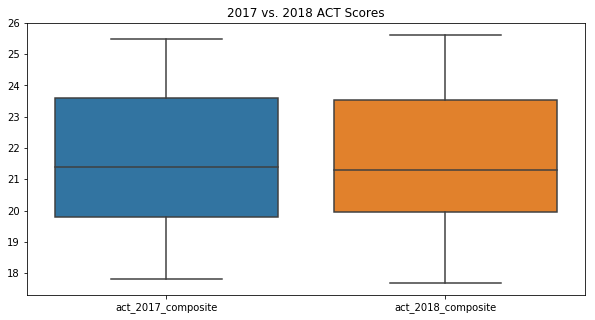

In [99]:
# 2017 vs. 2018 ACT Scores
act_2017_2018 = pd.DataFrame(final[['act_2017_composite','act_2018_composite']])

plt.figure(figsize=(10,5))
sns.boxplot(orient='v', data = act_2017_2018);
plt.title('2017 vs. 2018 ACT Scores');

Median score dipped only slightly from 2017 to 2018, with a slightly smaller spread in 2018. 

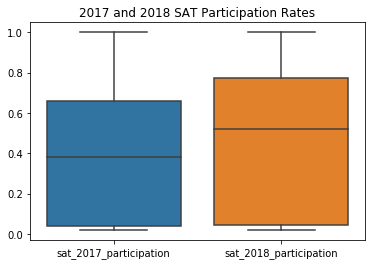

In [100]:
# 2017 and 2018 SAT Participation Rates
sat_participation = pd.DataFrame(final[['sat_2017_participation','sat_2018_participation']])

sns.boxplot(orient='v', data = sat_participation);
plt.title('2017 and 2018 SAT Participation Rates');

Median participation rates in SAT increased by around 10 percentage points from 2017 to 2018. Participation rates are right-skewed.

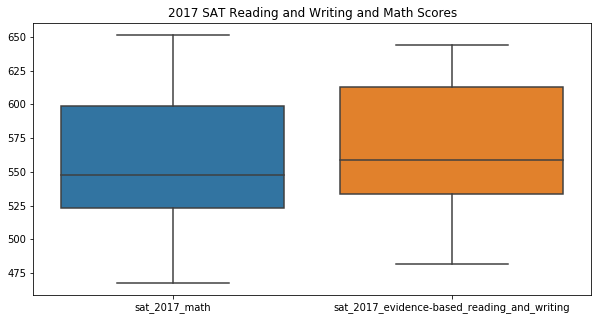

In [101]:
#2017 SAT Reading and Writing and Math Scores
sat_2017_scores = pd.DataFrame(final[['sat_2017_math','sat_2017_evidence-based_reading_and_writing']])

plt.figure(figsize=(10,5))
sns.boxplot(orient='v', data = sat_2017_scores);
plt.title('2017 SAT Reading and Writing and Math Scores');

Median score for reading and writing is higher than that for math.
The highest and lowest scores for Math are higher and lower than that of reading and writing.

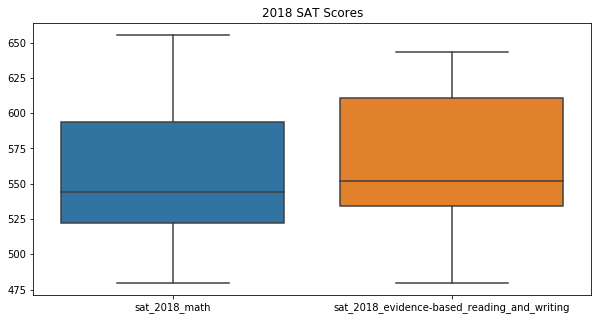

In [102]:
# 2018 SAT Scores
sat_2018_scores = pd.DataFrame(final[['sat_2018_math','sat_2018_evidence-based_reading_and_writing']])

plt.figure(figsize=(10,5))
sns.boxplot(orient='v', data = sat_2018_scores);
plt.title('2018 SAT Scores');

Again, the median score for reading and writing is higher than that for Math. At the same time, the highest score for math is higher than that of reading and writing.

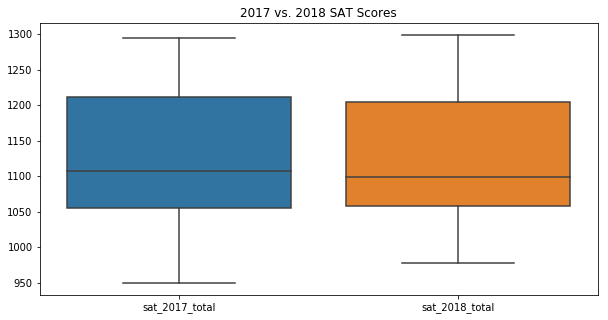

In [103]:
# 2017 vs. 2018 SAT Scores
sat_2017_2018 = pd.DataFrame(final[['sat_2017_total','sat_2018_total']])

plt.figure(figsize=(10,5))
sns.boxplot(orient='v', data = sat_2017_2018);
plt.title('2017 vs. 2018 SAT Scores');

The spread of the results is smaller in 2018 than in 2017. The median total score is lower in 2018. It may or may not be due to the increased participation rate in 2018. 

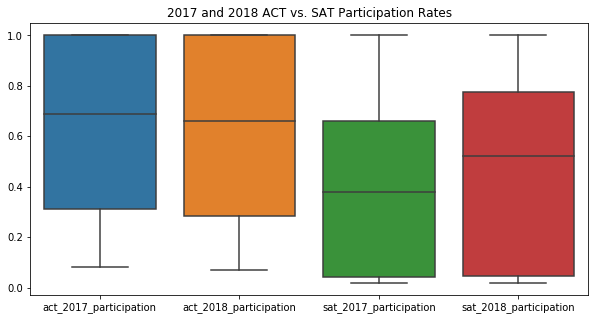

In [104]:
# 2017 and 2018 ACT vs SAT participation rates

act_sat_2017_2018 = pd.DataFrame(final[['act_2017_participation','act_2018_participation','sat_2017_participation','sat_2018_participation']])

plt.figure(figsize=(10,5))
sns.boxplot(orient='v', data = act_sat_2017_2018);
plt.title('2017 and 2018 ACT vs. SAT Participation Rates');

As we have noticed from previous analyses, SAT participation rates have increased in 2018 but ACT participation rates are still much higher than SAT's.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

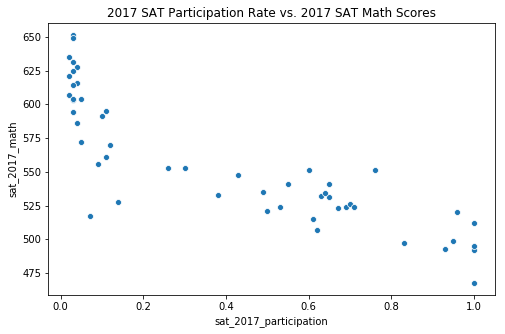

In [105]:
#SAT math score vs. SAT participation rate for 2017
plt.figure(figsize=(8,5))
sns.scatterplot(x='sat_2017_participation', y='sat_2017_math',data=final);
plt.title('2017 SAT Participation Rate vs. 2017 SAT Math Scores');

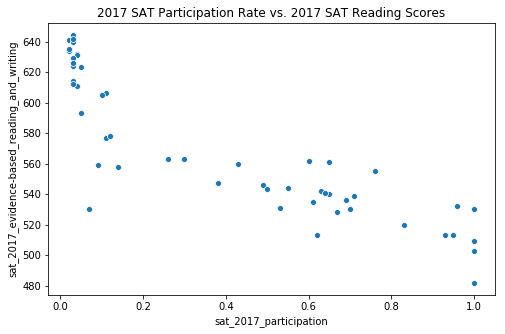

In [106]:
#SAT reading vs. SAT participation rate for 2017
plt.figure(figsize=(8,5))
sns.scatterplot(x='sat_2017_participation', y='sat_2017_evidence-based_reading_and_writing',data=final);
plt.title('2017 SAT Participation Rate vs. 2017 SAT Reading Scores');

Both scores show a negative correlation with the SAT participation rate in 2017. This indicates that the higher the participation rates by states result the lower the scores.

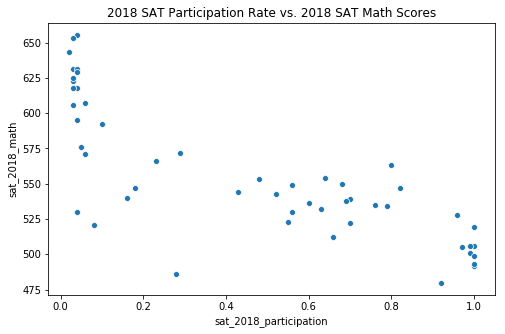

In [107]:
#SAT math score vs. SAT participation rate for 2018
plt.figure(figsize=(8,5))
sns.scatterplot(x='sat_2018_participation', y='sat_2018_math',data=final);
plt.title('2018 SAT Participation Rate vs. 2018 SAT Math Scores');

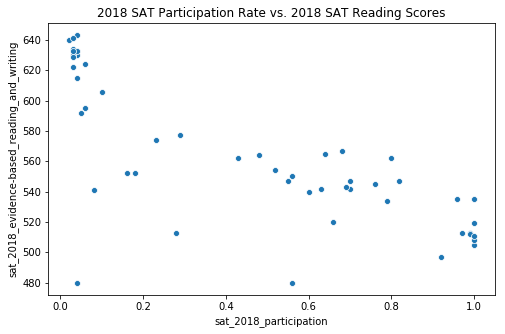

In [108]:
#SAT reading vs. SAT participation rate for 2018
plt.figure(figsize=(8,5))
sns.scatterplot(x='sat_2018_participation', y='sat_2018_evidence-based_reading_and_writing',data=final);
plt.title('2018 SAT Participation Rate vs. 2018 SAT Reading Scores');

The 2018 SAT scores also show a negative correlation with the SAT participation rate.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [109]:
# display summary statistics for all variables
summary_stats_final = final.describe()

summary_stats_final = summary_stats_final.append(pd.Series(final.skew(axis=0)).rename('skew'))
summary_stats_final = summary_stats_final.transpose()
summary_stats_final = summary_stats_final[['mean','25%','50%','75%','std','skew']]
summary_stats_final

,mean,25%,50%,75%,std,skew
act_2017_participation,0.652549,0.310,0.69,1.000,0.321408,-0.197989
act_2017_english,20.931373,19.000,20.70,23.300,2.353677,0.352660
act_2017_math,21.182353,19.400,20.90,23.100,1.981989,0.332683
act_2017_reading,22.013725,20.450,21.80,24.150,2.067271,0.269366
act_2017_science,21.450980,19.950,21.30,23.200,1.739353,0.218823
act_2017_composite,21.519608,19.800,21.40,23.600,2.020695,0.319810
sat_2017_participation,0.398039,0.040,0.38,0.660,0.352766,0.346450
sat_2017_evidence-based_reading_and_writing,569.117647,533.500,559.00,613.000,45.666901,0.272693
sat_2017_math,556.882353,523.500,548.00,599.000,47.121395,0.365040
sat_2017_total,1126.098039,1055.500,1107.00,1212.000,92.494812,0.310903


2017 and 2018 ACT Participation Rates:

The interquartile range (IQR) of participation rates for ACT 2017 and 2018 are large. In 2017, the 25th percentile is 31.0% and the 75th percentile is 100%, making the IQR = 69.0%. In 2018, the IQR is 71.5%, with the 25th percentile being 28.5% and the 75th being 100%. The minimum values for both ACT 2017 and 2018 are 7.0% and 8.0% respectively, which give a very wide range since the maximum value is 100%. 

The mean participation rate is 65.3% in 2017 and 61.6% in 2018. The median are 69.0% in 2017 and 66.0% in 2018. From the histograms earlier, we observe that the modal participation rates are 100% and a left-skewed distribution. Given that mean, mode and median all differ, we know that one of the features of a normal distribution (mean, mode and median are equal) is not fulfilled. Since the mean is less than the mode and the median, the distribution is negatively-skewed for both years. 

2017 and 2018 SAT Participation Rates:

The interquartile range (IQR) of participation rates for SAT 2017 and 2018 are large. In 2017, the 25th percentile is 4.0% and the 75th percentile is 66.0%, making the IQR = 62.0%. In 2018, the IQR is 73.0%, with the 25th percentile being 4.5% and the 75th being 77.5%. The spread of SAT and ACT participation rates are roughly similar. The minimum values for both SAT 2017 and 2018 are 2%, which give a very wide range since the maximum value is 100%. 

The mean participation rates are 39.8% in 2017 and 45.7% in 2018. The median are 38.0% in 2017 and 52.0% in 2018. From the histograms earlier, we observe that the modal participation rates are 0%. The mean in 2017 is higher than the median and mode, meaning that the distribution is right-skewed. The mean is higher than the mode in 2018, but lower than the median; even though 100% participation rates increased, 0% participation rates remain high. There are more occurences at the extreme ends. 


2017 ACT English, Math, Reading, Science and Composite Scores:

* 2017 English: 25th percentile = 19.0, median = 20.7, 75th percentile = 23.3, IQR = 4.3, min = 16.3, max = 25.5, mean = 20.9
* 2017 Math: 25th percentile = 19.4, median = 20.7, 75th percentile = 23.2, IQR = 3.7, min = 18.0, max = 25.3, mean = 21.2
* 2017 Reading: 25th percentile = 20.5, median = 21.8, 75th percentile = 24.2, IQR = 3.7, min = 18.1, max = 26.0, mean = 22.0
* 2017 Science: 25th percentile = 20.0, median = 21.3, 75th percentile = 23.2, IQR = 3.2, min = 18.2, max = 24.9, mean = 21.5
* 2017 Composite: 25th percentile = 19.8, median = 21.4, 75th percentile = 23.6, IQR = 3.8, min = 17.8, max = 25.5, mean = 21.5

Among all the papers, English has the biggest spread, with IQR of 4.3. It also sees the lowest minimum score. In terms of median score, Reading sees the highest score of 21.8. Science has the lowest IQR of 3.2 suggesting that students' grasp of Science in different states are not not that different as compared to their grasp of English. 
For all scores, the median and mean are close to each other, which may suggest normal distribution. However, the histogram of the 2017 Reading scores also have a few smaller peaks apart from the mode, which is at the range of 21. The histogram of the Math score shows 2 shorter peaks apart from the mode as well, indicating that the data might not follow a normal distribution. 

2018 ACT English, Math, Reading, Science and Composite Scores:

* 2018 English: 25th percentile = 19.1, median = 20.2, 75th percentile = 23.7, IQR = 4.6, min = 16.6, max = 26.0, mean = 21.0
* 2018 Math: 25th percentile = 19.4, median = 20.9, 75th percentile = 23.1, IQR = 3.7, min = 17.8, max = 25.2, mean = 21.1
* 2018 Reading: 25th percentile = 20.5, median = 21.6, 75th percentile = 24.1, IQR = 3.6, min = 18.0, max = 26.1, mean = 22.0
* 2018 Science: 25th percentile = 19.9, median = 21.1, 75th percentile = 23.1, IQR = 3.2, min = 17.9, max = 24.9, mean = 21.3
* 2018 Composite: 25th percentile = 20.0, median = 21.3, 75th percentile = 23.6, IQR = 3.6, min = 17.7, max = 25.6, mean = 21.5

English again has the biggest IQR of 4.6, indicating differing English capabilities among different states. It also sees the lowest minimum score, similar to 2017. In terms of median score, Reading sees the highest score of 21.6.
Even though the values of the median and mean are quite close to each other, an inspection of the histograms suggest that they may not follow the normal distribution. The histogram for 2018 ACT Math scores show bimodality. The 2018 Reading scores also have a few smaller peaks apart from the mode, which is at the range of 21.


2017 SAT Reading, Math and Total Scores:
* 2017 Reading and Writing: 25th percentile = 533.5, median = 559.0, 75th percentile = 613.0, IQR = 79.5, min = 482.0, max = 644.0, mean = 569.1
* 2017 Math: 25th percentile = 523.5, median = 548.0, 75th percentile = 599.0, IQR = 75.5, min = 468.0, max = 651.0, mean = 556.9
* 2017 Total: 25th percentile = 1055.5, median = 1107.0, 75th percentile = 1212.0, IQR = 156.5, min = 950.0, max = 1295.0, mean = 1126.1

From the histogram, 2017 SAT Reading scores is bimodal, which could suggest some differences in the background of the students in different states. It does not follow a normal distribution since the mean, median and mode differ from each other. For Math scores, the mean is 556.9, giving a difference of 8.9 between the median and the mean. Thus, it also does not follow a normal distribution. 

2018 SAT Reading, Math and Total Scores:
* 2018 Reading and Writing: 25th percentile = 534.5, median = 552.0, 75th percentile = 610.5, IQR = 76, min = 480.0, max = 643.0
* 2018 Math: 25th percentile = 522.5, median = 544.0, 75th percentile = 593.5, IQR = 71, min = 480.0, max = 655.0
* 2018 Total: 25th percentile = 1057.5, median = 1098.0, 75th percentile = 1204.0, IQR = 146.5, min = 977.0, max = 1298.0

The 2018 SAT Reading scores is also bimodal and does not follow a normal distribution, similar to 2017. The Math score also does not follow a normal distribution. 

#### We generally assume that the data we sample from a population will be normally distributed. Do we observe this trend?

Answer:


Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
From the plots below and the previous analyses above, we can conclude that the data sampled are not normally distributed. The estimates will not reflect the true population parameters. 

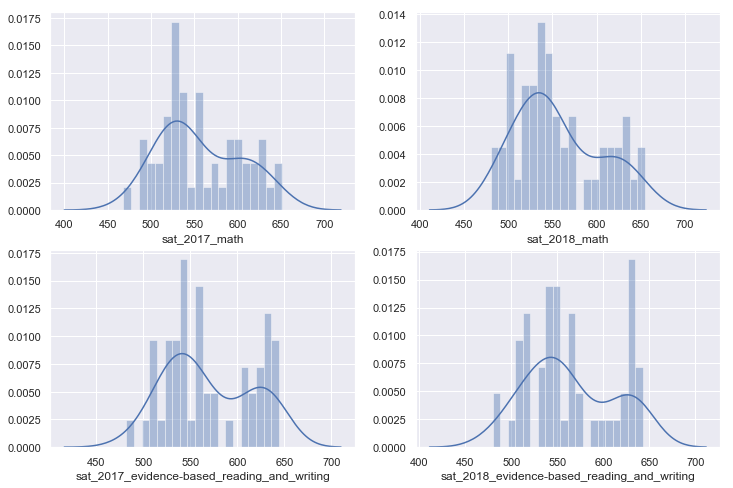

In [110]:
# using distplot to plot histograms with kde to visually check if data are normally distributed
# 2017 and 2018 SAT Math and Reading Scores
from pylab import *
sns.set(rc={"figure.figsize": (12, 8)})

subplot(2,2,1)
ax = sns.distplot(final['sat_2017_math'], bins=20)

subplot(2,2,2)
ax = sns.distplot(final['sat_2018_math'], bins=20)

subplot(2,2,3)
ax = sns.distplot(final['sat_2017_evidence-based_reading_and_writing'], bins=20)

subplot(2,2,4)
ax = sns.distplot(final['sat_2018_evidence-based_reading_and_writing'], bins=20)

Visually, we can see that they do not follow a normal distribution. They are slightly right-skewed. The best fit lines are not bell-shaped.

In [111]:
# check for noramlity using Shapiro-Wilk test
from scipy import stats

stats.shapiro(final['sat_2017_math'])

(0.9493668675422668, 0.029660698026418686)

In [112]:
stats.shapiro(final['sat_2018_math'])

(0.9374470114707947, 0.009714742191135883)

In [113]:
stats.shapiro(final['sat_2017_evidence-based_reading_and_writing'])

(0.920563280582428, 0.0022041318006813526)

In [114]:
stats.shapiro(final['sat_2018_evidence-based_reading_and_writing'])

(0.927172839641571, 0.003885231912136078)

Since the p-value for all the SAT math and reading scores are less than 0.05, they are not normally distributed.

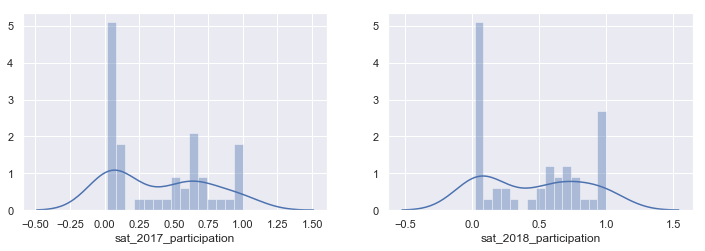

In [115]:
#2017 and 2018 SAT Participation Rates 
sns.set(rc={"figure.figsize": (12, 8)})

subplot(2,2,1)
ax = sns.distplot(final['sat_2017_participation'], bins=15)

subplot(2,2,2)
ax = sns.distplot(final['sat_2018_participation'], bins=15)

The SAT participation rates do not follow the normal distribution as well. The lines are almost flat and there are large occurences of 0% participation rate. They are not symmetric around the mean.

In [116]:
stats.shapiro(final['sat_2017_participation'])

(0.8536624908447266, 1.6491485439473763e-05)

In [117]:
stats.shapiro(final['sat_2018_participation'])

(0.8562899827957153, 1.9515344320097938e-05)

Both the 2017 and 2018 SAT partcipation rates are not normally distributed since p-value are less than 0.05

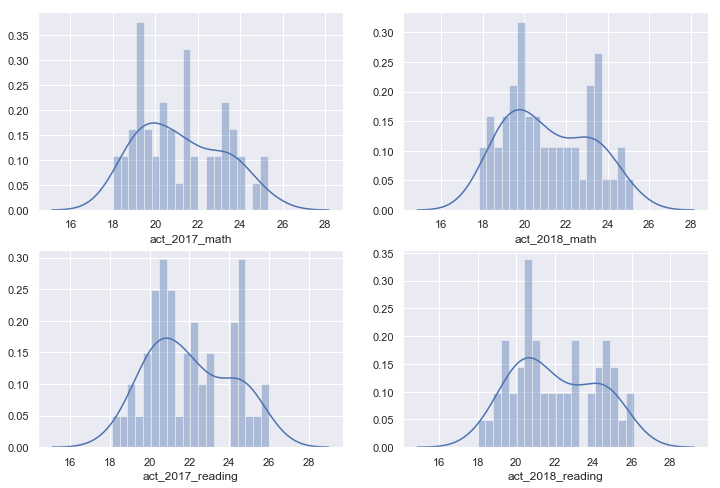

In [118]:
# 2017 and 2018 ACT Math and Reading Scores
sns.set(rc={"figure.figsize": (12, 8)})

subplot(2,2,1)
ax = sns.distplot(final['act_2017_math'], bins=20)

subplot(2,2,2)
ax = sns.distplot(final['act_2018_math'], bins=20)

subplot(2,2,3)
ax = sns.distplot(final['act_2017_reading'], bins=20)

subplot(2,2,4)
ax = sns.distplot(final['act_2018_reading'], bins=20)

The ACT Math and Reading scores also do not follow a normal distribution. They are slightly right-skewed, similar to SAT scores.

In [119]:
stats.shapiro(final['act_2017_math'])

(0.9527901411056519, 0.041251927614212036)

In [120]:
stats.shapiro(final['act_2018_math'])

(0.9506924748420715, 0.03368766978383064)

In [121]:
stats.shapiro(final['act_2017_reading'])

(0.9556081295013428, 0.05425470694899559)

In [122]:
stats.shapiro(final['act_2018_reading'])

(0.9529093503952026, 0.04173128679394722)

Since the p-value of 2017 ACT Reading scores is greater than 0.05, then the null hypothesis that the scores follow a normal distribution is not rejected.
For the rest of the scores, the null hypothesis is rejected, indicating that they do not follow a normal distribution.

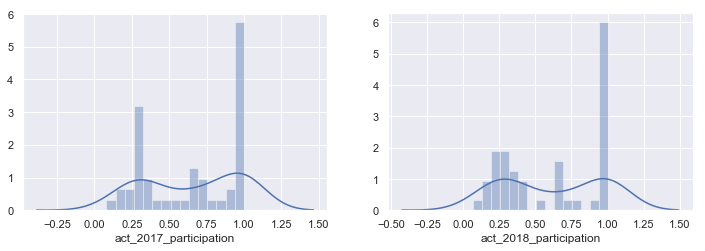

In [123]:
#2017 and 2018 ACT Participation Rates 
sns.set(rc={"figure.figsize": (12, 8)})

subplot(2,2,1)
ax = sns.distplot(final['act_2017_participation'], bins=15)

subplot(2,2,2)
ax = sns.distplot(final['act_2018_participation'], bins=15)

ACT participation rates do not follow a normal distribution. There are very clear peaks at the 100% participation rate for both years. The best fit line is not bell-shaped.

In [124]:
stats.shapiro(final['act_2017_participation'])

(0.8398400545120239, 6.9784323386556935e-06)

In [125]:
stats.shapiro(final['act_2018_participation'])

(0.8256993889808655, 3.0170992886269232e-06)

The 2017 and 2018 ACT participation rates do not follow a normal distribution.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actual populations these data describe in answering this question)*

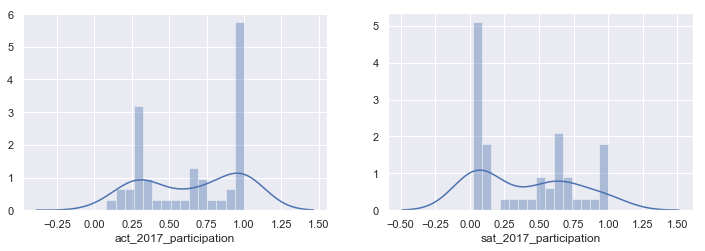

In [126]:
#2017 SAT and ACT Participation Rates 
sns.set(rc={"figure.figsize": (12, 8)})

subplot(2,2,1)
ax = sns.distplot(final['act_2017_participation'], bins=15)

subplot(2,2,2)
ax = sns.distplot(final['sat_2017_participation'], bins=15)

Answer:

Granularity and aggregation:

The granularity of data refers to the size in which data fields are sub-divided. In this case, there is coarse granularity in terms of recording of participation rates by states. The 2017 participation rates show humps, which indicate that there could be composite distributions in each field. Even though the granularity of the participation rates is coarse, the rates are greatly influenced by state requirements and whether the tests are administered for free. For instance, 12 states in the U.S. require ACT. So, conducting a statistical inference using these data still makes sense. In order to draw more inference, we could aggregate more data on the income, race, gender and school assessment scores to identify the groups of students who would sit for a particular tests.


Population sizes and rates:

The data provides participation rate by state. Different states have different population sizes, which could mean that a state with a bigger population size but smaller participation rate will still have a higher absolute number of students taking a test. This means that the participation rate may not reflect the true popularity of the tests nationwide. The rates could be weighted to reflect the population size or the absolute number of students who sat for a test could be used instead.


##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

The SAT and ACT math scores are not normally distributed. So it is not possible to compare the two scores which could possibly have been done if they had been normally distributed. 

Given the current data, we have two sets of tests with different scoring requirements and different scales of scoring. Besides, we have seen that states with lower participation rates tend to have higher scores. Since SAT have lower participation rates in general, it would mean that the students would have higher scores. This is because of self-selection, whereby only higher-performing students will take an additional test on top of the one required by the state since they are able to do well on the test.

Thus, it is not appropriate to compare SAT and ACT math scores.


#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [127]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [128]:
# looking for the two states which saw significant drops in SAT scores from 2017 and 2018 and the two states which have increased ACT scores
score_difference = pd.DataFrame(final[['state','sat_2017_total','sat_2018_total','act_2017_composite','act_2018_composite']])

In [129]:
def diff(score1, score2):
    score_diff = []
    for i in range(len(score1)):
        score_diff.append(score1[i]-score2[i])

    return score_diff

In [130]:
score_difference['sat_diff'] = diff(final['sat_2018_total'],final['sat_2017_total'])

In [131]:
score_difference['act_diff'] =  diff(final['act_2018_composite'],final['act_2017_composite'])

In [132]:
# looking for the two states in the scatter plot which saw significant drops in SAT scores from 2017 and 2018
score_difference.sort_values('sat_diff').head(3)

,state,sat_2017_total,sat_2018_total,act_2017_composite,act_2018_composite,sat_diff,act_diff
44,Utah,1238,1010,20.3,20.4,-228,0.1
5,Colorado,1201,1025,20.8,23.9,-176,3.1
13,Illinois,1115,1019,21.4,23.9,-96,2.5


In [133]:
# looking for the two states which saw significant increases in ACT scores from 2017 and 2018
score_difference.sort_values('act_diff',ascending=False).head(2)

,state,sat_2017_total,sat_2018_total,act_2017_composite,act_2018_composite,sat_diff,act_diff
5,Colorado,1201,1025,20.8,23.9,-176,3.1
13,Illinois,1115,1019,21.4,23.9,-96,2.5


In [134]:
# check changes in participation rates for Utah, Colorado and Illinois
final[['state','act_2017_participation','act_2018_participation','sat_2017_participation','sat_2018_participation']][(final['state'] == 'Utah')|(final['state'] == 'Colorado')|(final['state'] == 'Illinois')]

,state,act_2017_participation,act_2018_participation,sat_2017_participation,sat_2018_participation
5,Colorado,1.00,0.30,0.11,1.00
13,Illinois,0.93,0.43,0.09,0.99
44,Utah,1.00,1.00,0.03,0.04


Colorado and Illinois both have increased SAT participation rates, which explains the drop in SAT scores.
Utah, however did not have much change in the SAT participation rate even though there is a large drop in scores.
For the purpose of finding interesting trends in their SAT and ACT participation rates, we will look at Colorado and Illinois but not Utah. 

In [135]:
# look for another state
final[['state','act_2017_participation','act_2018_participation','sat_2017_participation','sat_2018_participation']].sort_values('act_2018_participation', ascending=False).head(10)

,state,act_2017_participation,act_2018_participation,sat_2017_participation,sat_2018_participation
0,Alabama,1.00,1.0,0.05,0.06
17,Kentucky,1.00,1.0,0.04,0.04
49,Wisconsin,1.00,1.0,0.03,0.03
44,Utah,1.00,1.0,0.03,0.04
42,Tennessee,1.00,1.0,0.05,0.06
40,South Carolina,1.00,1.0,0.50,0.55
36,Oklahoma,1.00,1.0,0.07,0.08
35,Ohio,0.75,1.0,0.12,0.18
33,North Carolina,1.00,1.0,0.49,0.52
28,Nevada,1.00,1.0,0.26,0.23


Ohio experienced an increase in both ACT and SAT participation rates. We will examine why that happened.

## Findings:

Colorado:
SAT participation rate increased from 11% to 100%.
In 2017/18, Colorado became one of the 12 states to cover the cost of the SAT for all their public school students. The College Board has been pushing hard to win contracts with entire states or districts. ACT, on the other hand lost contracts in Colorado, contributing to the big drop in participation from 100% to 30%. Besides, as of the 2016-17, all Colorado juniors in public schools will have to take the SAT.

Illinois:

SAT participation rate increased from 9% to 99%.
Illinois was also one of the 12 states to start providing SAT for free for students. ACT also lost its contract with Illinois. Performance-wise, Illinois lagged behind national mean scores  in 2018 in the SAT but the ACT scores rose and the average composite score was higher than the national average. This can again be attributed to student self-selection to ACT. Since SAT is now provided for free, most students will sit for the test but only the better students will sit for both ACT and SAT. Similar to Colorado, Illinois started requiring all juniors to take the SAT.

Ohio: 

Both SAT and ACT participation rates increased, 12% to 18% and 75% to 100% respectively. Both the SAT or ACT is given during the school day and both tests are administered for free because the state is paying for each student to take one of the tests once. The ACT is the overwhelming preference of students in Ohio even though Ohio accepts both ACT or SAT as the requirement for high school test. Each school district selects whether the free test will be ACT or SAT. The ACT has traditionally been the more popular test in the Midwest, which is where Ohio is located. This could be the reason why ACT is still the more popular test despite SAT's restructuring of scoring methodology in 2015.

Sources:

https://blog.prepscholar.com/which-states-require-the-sat
https://www.theatlantic.com/education/archive/2015/06/should-the-sat-be-part-of-school/395417/
https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html
https://www.insidehighered.com/admissions/article/2019/09/24/minority-and-first-generation-sat-scores-fall-behind
https://www.dispatch.com/news/20170228/ohio-schools-must-now-give-act-or-sat-to-all-juniors
http://blogs.edweek.org/edweek/high_school_and_beyond/2018/10/more_than_2_million_students_take_the_sat.html

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

The SAT has traditionally been considered more aptitute-based while the ACT is considered more content-based than the SAT and therefore, a better tool of assessment of learning. 
However, the redesigned SAT, which was released in 2016 to align the SAT with Common Core standards, has made it more appealing as an assessment test compared to the older version of the SAT.

Along with the redesigning of the SAT, the College Board introduced fee waivers and free test preparation to increase access for low-income, first-generation and minority students.
Iowa has a lower than 100% participation rate for both ACT and SAT and has an extremely low SAT participation rate. 

From earlier findings, we see that Colorado and Illinois recorded big jumps in SAT participation rates because of state-funded testings. 

The state chosen is Texas because of:
1. Participation rate, population size and projected growth in population: 62% participation rate in the second most populous in the U.S. gives enough room for expansion of the SAT. Texas saw the biggest increase in population in 2018. What is notable is that Texas population saw a jump as the nation's population growth slows, making it an ideal state for the SAT to gain a foothold in. Texas population would also pass California in 2045 if she continues to expand at 1.3% per year.
2. Demography of Texas' population: In 2018, the majority of migrants to Texas came from other countries rather than other states in the US or Latin America. The College Board introduced fee waivers and free test preparation in an attempt to increase access to the test for low-income, first-generation and minority students. This can be utilised well in Texas.
3. Current participation rate an indication of ease of legislating SAT in the state: The 2018 SAT participation rate was 66% while the ACT participation rate was 41%, indicating that standardised tests are common in the state. This would make it easier for the state to buy in to the idea of mandatory testing.

Recommendations for Texas:
1. Requiring students to take SAT for graduation and making it a state-funded test is the most effective way of increasing state participation rate. 
2. It is also important to highlight the fee waivers and free test preparation that have been introduced by the College Board to appeal to the state and the minority students.
3. The College Board can emphasise that the test has been redesigned and encourage test preparation in order for students to score better should the state have to justify funding of the SAT using test scores. 

Additional data required for a more informed investigation:

1. The result of a bill now making its way through California's legislature requiring the public University of California system and California State University system to study the usefulness and fairness of standardised tests in the admissions process. This may have an impact on state funding of standardised tests nationwide. 
2. The number or percentage of universities in Texas that require or recommend SAT testing. This assumes that most Texan students pursue their college education in Texas itself.
3. The size of student population not taking either tests to investigate the possible increase in SAT test administration. 
4. Possible correlation of test scores with ease of getting state funding. If the chances of obtaining the funding is justified via higher test scores, then the College Board should highlight the availability of test preparations for SAT now that it has been redesigned to be aligned with Common Core standards. 
5. State budget for education: Texas has to keep the state and local shares at about 45 percent each, which means that the lawmakers have to find 9 billion dollars for the next two-year budget. Whether they are able to obtain the 9 billion dollars will impact whether state funding can be implemented for SAT. 